<a href="https://colab.research.google.com/github/mteoraso/Energia_electrica_COL_XM/blob/EDA/demanda_no_atendida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pydataxm

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 17.1 MB/s eta 0:00:00
  Created wheel for pydataxm: filename=pydataxm-0.3.12-py3-none-any.whl size=13050 sha256=505d9e542ce19877f45e589f7d8995a9c80482256515d2c42f59919260a5079c
  Stored in directory: /root/.cache/pip/wheels/98/0e/34/8f4f853a19b48703369a032318a29282b5c5ad81a3cd1e1494
Successfully built pydataxm


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Importación
from pydataxm.pydatasimem import ReadSIMEM, CatalogSIMEM

# Crear una instancia de ReadSIMEM
dataset_id = '3C77AF'
fecha_inicio = '2020-01-01'
fecha_fin = '2024-04-30'
generacion = ReadSIMEM(dataset_id, fecha_inicio, fecha_fin)

# Recuperar datos
data = generacion.main(filter=False)
print(data)

****************************************************************************************************
Initializing object
The object has been initialized with the dataset: "Eventos de Demanda No Atendida"
****************************************************************************************************
Inicio consulta sincronica
Creacion url: 0.0008158683776855469
Extraccion de registros: 130.45474672317505
End of data extracting process
****************************************************************************************************
     IdentificadorSuceso      FechaHoraInicio         FechaHoraFin  \
0             S000017905  2020-01-31 13:04:00  2020-01-31 19:59:00   
1             S000017904  2020-01-29 09:43:00  2020-01-29 09:53:00   
2             S000017903  2020-01-27 14:24:00  2020-01-27 16:31:00   
3             S000017901  2020-01-26 07:24:00  2020-01-26 13:15:00   
4             S000017902  2020-01-26 05:16:00  2020-01-26 06:34:00   
...                  ...            

In [ ]:
data

,IdentificadorSuceso,FechaHoraInicio,FechaHoraFin,OrigenEvento,EnergiaNoAtendida,DescripcionEvento,CodigoSubAreaOperativa
0,S000017905,2020-01-31 13:04:00,2020-01-31 19:59:00,No programada,151140.0,Demanda no atendida por disparo del activo SAN...,Are0025
1,S000017904,2020-01-29 09:43:00,2020-01-29 09:53:00,No programada,4630.0,Demanda no atendida por trabajos en la consign...,Are0029
2,S000017903,2020-01-27 14:24:00,2020-01-27 16:31:00,No programada,14610.0,Demanda no atendida por sobrecarga del activo ...,Are0018
3,S000017901,2020-01-26 07:24:00,2020-01-26 13:15:00,Programada,45100.0,Demanda no atendida por trabajos en la consign...,Are0025
4,S000017902,2020-01-26 05:16:00,2020-01-26 06:34:00,Programada,26650.0,Demanda no atendida por trabajos en la consign...,Are0016
...,...,...,...,...,...,...,...
3585,S000022218,2024-04-01 00:00:00,2024-04-01 00:38:00,No programada,1080.0,Continua demanda no atendida por disparo del a...,Are0019
3586,S000022219,2024-04-01 20:02:00,2024-04-01 21:53:00,No programada,41770.0,Demanda no atendida por disparo del activo BT ...,Are0032
3587,S000022217,2024-03-31 23:08:00,2024-03-31 23:59:00,No programada,1440.0,Demanda no atendida por disparo del activo BL1...,Are0019
3588,S000022327,2024-04-30 15:17:00,2024-04-30 15:30:00,No programada,2030.0,Demanda no atendida por disparo del activo LA ...,Are0015


# **Analisis Exploratorio de datos**

In [ ]:
data.describe()

,FechaHoraInicio,FechaHoraFin,EnergiaNoAtendida,DuracionSegundos,Duracion,DuracionHoras,Horas,Minutos
count,3590,3590,3.590000e+03,3590.000000,3590,3590.000000,3590,3590
mean,2022-03-06 14:39:31.671309056,2022-03-06 19:00:33.041782528,6.429359e+04,15661.370474,0 days 04:21:01.370473537,4.350381,0 days 00:00:04.350380686,0 days 00:00:00.000000019
min,2020-01-01 02:25:00,2020-01-01 03:18:00,7.000000e+01,-480.000000,-1 days +23:52:00,-0.133333,-1 days +23:59:59.866666667,-1 days +23:59:59.999999980
25%,2021-02-05 21:08:45,2021-02-05 21:26:00,3.960000e+03,1080.000000,0 days 00:18:00,0.300000,0 days 00:00:00.300000,0 days 00:00:00
50%,2022-01-26 17:51:30,2022-01-26 18:54:00,1.558500e+04,5970.000000,0 days 01:39:30,1.658333,0 days 00:00:01.658333333,0 days 00:00:00.000000020
75%,2023-05-09 13:38:00,2023-05-09 15:57:30,7.000000e+04,27420.000000,0 days 07:37:00,7.616667,0 days 00:00:07.616666666,0 days 00:00:00.000000040
max,2024-04-30 15:17:00,2024-04-30 18:32:00,2.608110e+06,142260.000000,1 days 15:31:00,39.516667,0 days 00:00:39.516666666,0 days 00:00:00.000000040
std,NaN,NaN,1.288574e+05,19805.768154,0 days 05:30:05.768154134,5.501602,0 days 00:00:05.501602265,0 days 00:00:00.000000016


In [ ]:
data.shape

(3590, 12)

In [ ]:
data.columns

Index(['IdentificadorSuceso', 'FechaHoraInicio', 'FechaHoraFin',
       'OrigenEvento', 'EnergiaNoAtendida', 'DescripcionEvento',
       'CodigoSubAreaOperativa', 'DuracionSegundos', 'Duracion',
       'DuracionHoras', 'Horas', 'Minutos'],
      dtype='object')

**Limpieza y transformacion de datos**

In [ ]:
data.isnull().sum()

,0
IdentificadorSuceso,0
FechaHoraInicio,0
FechaHoraFin,0
OrigenEvento,0
EnergiaNoAtendida,0
DescripcionEvento,0
CodigoSubAreaOperativa,0


In [ ]:
data = data.astype({"FechaHoraInicio": "datetime64[ns]"})
data = data.astype({"FechaHoraFin": "datetime64[ns]"})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3590 entries, 0 to 3589
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   IdentificadorSuceso     3590 non-null   object        
 1   FechaHoraInicio         3590 non-null   datetime64[ns]
 2   FechaHoraFin            3590 non-null   datetime64[ns]
 3   OrigenEvento            3590 non-null   object        
 4   EnergiaNoAtendida       3590 non-null   float64       
 5   DescripcionEvento       3590 non-null   object        
 6   CodigoSubAreaOperativa  3590 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 196.5+ KB


In [ ]:
## Identificacion de registros duplicados donde coinciden en todos los campos
DF_duplicados = data.duplicated()
print(f"El numero de registros duplicados es de: {DF_duplicados.sum()}")

El numero de registros duplicados es de: 0


In [ ]:
DF_duplicados

,0
0,False
1,False
2,False
3,False
4,False
...,...
3585,False
3586,False
3587,False
3588,False


In [ ]:
## Visualizo los registros unicos de cada campo
columnas_DF = data.columns
for i in columnas_DF:
  print(f"Valores unicos en la columna {i}:")  ## Nombro la columna a mostrar
  print(pd.unique(data[i]))  ## Imprimo los valores unicos de cada columna

Valores unicos en la columna IdentificadorSuceso:
['S000017905' 'S000017904' 'S000017903' ... 'S000022217' 'S000022327'
 'S000022328']
Valores unicos en la columna FechaHoraInicio:
['2020-01-31T13:04:00.000000000' '2020-01-29T09:43:00.000000000'
 '2020-01-27T14:24:00.000000000' ... '2024-03-31T23:08:00.000000000'
 '2024-04-30T15:17:00.000000000' '2024-04-30T14:57:00.000000000']
Valores unicos en la columna FechaHoraFin:
['2020-01-31T19:59:00.000000000' '2020-01-29T09:53:00.000000000'
 '2020-01-27T16:31:00.000000000' ... '2024-03-31T23:59:00.000000000'
 '2024-04-30T15:30:00.000000000' '2024-04-30T18:32:00.000000000']
Valores unicos en la columna OrigenEvento:
['No programada' 'Programada']
Valores unicos en la columna EnergiaNoAtendida:
[151140.   4630.  14610. ... 230000.  15230.  41770.]
Valores unicos en la columna DescripcionEvento:
['Demanda no atendida por disparo del activo SAN JUAN 2 50 MVA 110/34.5/13.8 KV transformador de carga de la S/E radial San Juan 110 kV.'
 'Demanda no a

In [ ]:
descripciones_eventos = pd.unique(data['DescripcionEvento'])
descripciones_eventos

array(['Demanda no atendida por disparo del activo SAN JUAN 2 50 MVA 110/34.5/13.8 KV transformador de carga de la S/E radial San Juan 110 kV.',
       'Demanda no atendida por trabajos en la consignación C0176405 del activo BL1 BELEN(CUCUTA) A LA INSULA 115 kV. Se materializa Riesgo de Disparo sobre la BL1 BELEN(CUCUTA) A SEVILLA 115 kV.',
       'Demanda no atendida por sobrecarga del activo CARTAGENA - ZARAGOCILLA 1 66 KV al quedar radial la subestación ZARAGOCILLA 66 kV por disparo del activo TERNERA - ZARAGOCILLA 1 66 kV.',
       ...,
       'Demanda no atendida por disparo del activo BT PANCE 5 41.8 MVA 110 kV.',
       'Demanda no atendida por disparo del activo BL1 GUAPI A OLAYA HERRERA 115 KV dejando sin tension la subestación radial OLAYA HERRERA 115 KV.',
       'Demanda no atendida por disparo del activo ESMERALDA - VITERBO 1 115 kV dejando sin tensión la subestación radial VITERBO 115 kV.'],
      dtype=object)

In [ ]:
len(descripciones_eventos)

2802

**Identificacion de patrones y relaciones entre campos**

In [ ]:
## Cantidad de eventos por categoria (Programados y no programados)
DF_origen_evento = data.groupby(['OrigenEvento']).size()
DF_origen_evento

,0
OrigenEvento,
No programada,2626
Programada,964


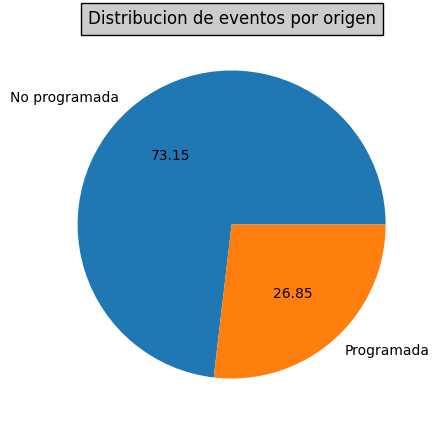

In [ ]:
DF_origen_evento_plot = DF_origen_evento.plot.pie(
    figsize=(5, 5),
    autopct="%.2f")
plt.title("Distribucion de eventos por origen", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [ ]:
## Cantidad de energia no atendida por origen de evento
DF_origen_cant = data.groupby('OrigenEvento')['EnergiaNoAtendida'].sum().round(20).sort_values(ascending=False)
DF_origen_cant

,EnergiaNoAtendida
OrigenEvento,
Programada,1.424111e+08
No programada,8.840288e+07


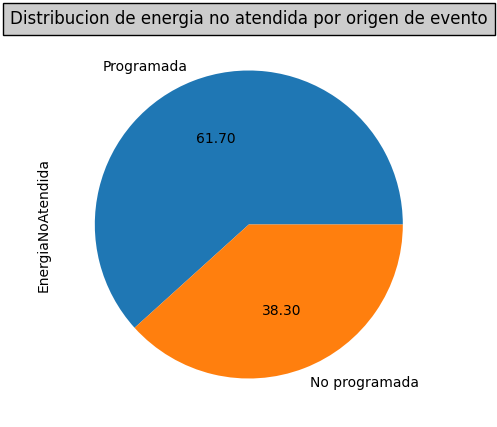

In [ ]:
accidentes_sexo_plot = DF_origen_cant.plot.pie(
    figsize=(5, 5),
    autopct="%.2f")
plt.title("Distribucion de energia no atendida por origen de evento", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

<ipython-input-105-e7fe1682dfd6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['OrigenEvento'], y=data['EnergiaNoAtendida'], palette="pastel")


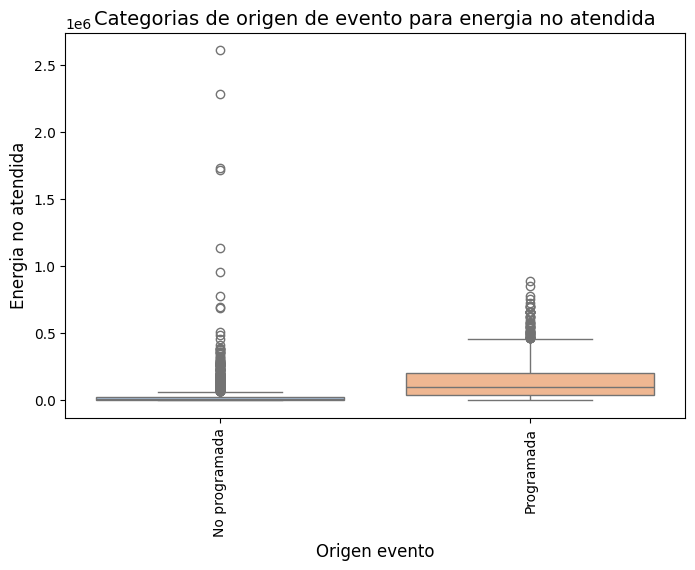

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=data['OrigenEvento'], y=data['EnergiaNoAtendida'], palette="pastel")
plt.title('Categorias de origen de evento para energia no atendida', fontsize=14)
plt.xlabel('Origen evento', fontsize=12)
plt.ylabel('Energia no atendida', fontsize=12)
plt.xticks(rotation=90)
plt.show()

<ipython-input-146-77d92de49812>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data['EnergiaNoAtendida'], palette="pastel")


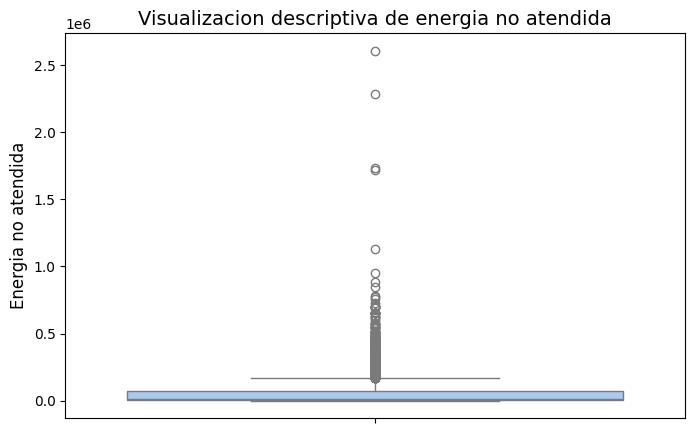

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(y=data['EnergiaNoAtendida'], palette="pastel")
plt.title('Visualizacion descriptiva de energia no atendida', fontsize=14)
plt.ylabel('Energia no atendida', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [ ]:
## Identificacion de energia no atendida por descripcion de evento
data.groupby('DescripcionEvento')['EnergiaNoAtendida'].sum().sort_values(ascending=False)

,EnergiaNoAtendida
DescripcionEvento,
Se presenta DNA por evento en las subáreas Atlántico Bolívar y GCM pertenecientes al área Caribe. Debido a falla en el CT de la fase A del activo BL2 SABANALARGA A FUNDACION 220 kV adicionalmente se disparan los extremos remotos asociados a los circuitos de la subestación SABANALARGA 220 kV.,6625350.00
Continua demanda no atendida por trabajos en la consignación de emergencia C0196936 del activo SAMORE - TOLEDO 1 230 kV dejando sin tensión las subestaciones radiales SAMORE 230 kV BANADIA 230 kV y CAÑO LIMON 230 kV.,3802000.00
Continua demanda no atendida por trabajos en la consignación de emergencia C0196936 del activo SAMORE - TOLEDO 1 230 kV dejando sin tensión las subestaciones radiales SAMORE 230 kV BANADIA 230 kV y CAÑO LIMON 230 kV.,2664050.00
Continua demanda no atendida por evento en la S/E VALLEDUPAR 220 KV -110 KV-34.5 KV- 13.8 KV.,1887370.02
"Continúa demanda no atendida por disparo de los activos asociados a la barra CHINÚ 110 KV y el transformador CHINÚ 1 150 MVA 500/110/34.5 kV; dejando sin tensión las subestaciones: CHINÚ PLANTA 110 kV, SAN MARCOS (SUCRE) 110 kV, LA MOJANA 110 kV, CHINÚ PLANTA 110 kV, SINCÉ 110 kV, MAGANGUÉ 110 kV, MOMPOX 110 kV, BOSTON 110 kV, COVEÑAS 110 kV, SIERRA FLOR 110 kV, TOLUVIEJO 110 kV, EL CARMEN 110 kV, ZAMBRANO 66 kV, SAN JACINTO 66 kV y CALAMAR 66 kV.",1717050.00
...,...
Demanda no atendida por disparo de los activos asociados a la subestación CONVENCION 115 kV dejando sin tensión las subestaciones temporalmente radiales CONVENCION 115 kV y TIBU 115 kV.,1000.00
"Continúa demanda no atendida por disparo del activo BL1 EL PASO A EL BANCO 110 kV, dejando sin tensión la S/E radial EL BANCO 110 kV.",1000.00
Continua demanda no atendida por criterios de confiabilidad de la subárea Bolivar.,1000.00


In [ ]:
## Identificacion de energia no atendida y cantidad de eventos por subarea operativa
DF_subarea = data.groupby('CodigoSubAreaOperativa').agg(
    TotalEnergiaNoAtendida=('EnergiaNoAtendida', 'sum'),
    CantidadRegistros=('CodigoSubAreaOperativa', 'size'),
).reset_index()

DF_subarea = DF_subarea.sort_values(by=['TotalEnergiaNoAtendida'], ascending=False)  ## Ordeno valores por cantidad de energia no atendida
DF_subarea['EnergiaNoAtendidaPorRegistro'] = round(DF_subarea['TotalEnergiaNoAtendida'] / DF_subarea['CantidadRegistros'], 4)

# Muestra el nuevo DataFrame
DF_subarea

,CodigoSubAreaOperativa,TotalEnergiaNoAtendida,CantidadRegistros,EnergiaNoAtendidaPorRegistro
8,Are0025,61339430.00,768,79869.0495
3,Are0018,46415029.97,654,70970.9938
1,Are0016,34914180.02,261,133770.8047
6,Are0021,25062750.02,327,76644.4955
4,Are0019,12860440.00,349,36849.3983
15,Are0129,10426030.00,57,182912.8070
2,Are0017,7099660.00,142,49997.6056
10,Are0027,7099239.99,167,42510.4191
9,Are0026,6678540.00,92,72592.8261
18,Are0132,4208450.00,114,36916.2281


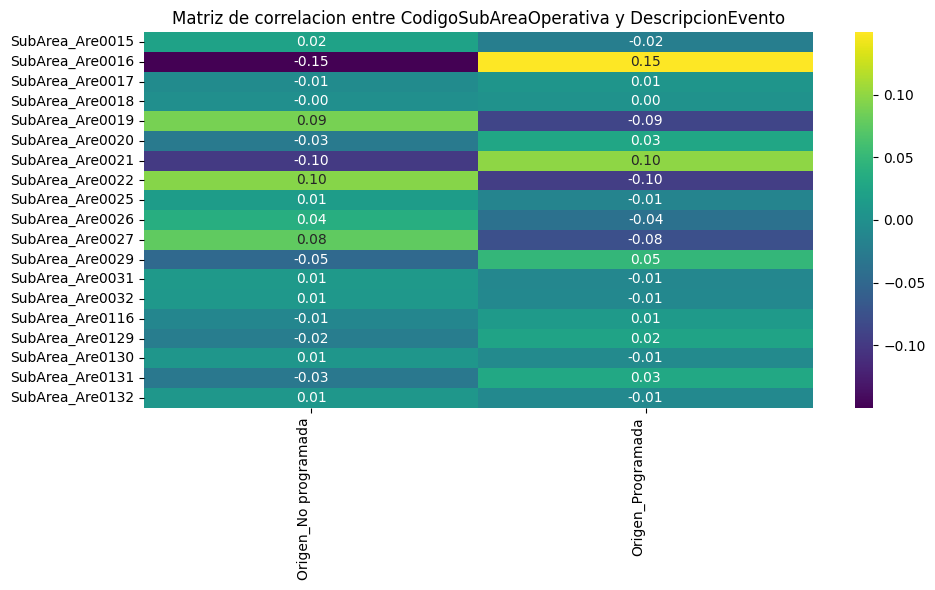

In [ ]:
# Creacion de DF
df_corr = data[['CodigoSubAreaOperativa', 'OrigenEvento']]

# Conversion en variables Dummy para colunas con variables categoricas
df_corr_dummy = pd.get_dummies(df_corr,
                               columns=['CodigoSubAreaOperativa', 'OrigenEvento'],
                               prefix=['SubArea', 'Origen'])

# Calculo de matriz de correlacion entre variables convertidas
corr = df_corr_dummy.corr()

# Reordeno para que en el eje X me quede el campo de origen Evento, y en el eje Y el codigo Subarea
subarea_cols = [col for col in corr.columns if col.startswith('SubArea')]
origen_cols = [col for col in corr.columns if col.startswith('Origen')]
corr_selected = corr.loc[subarea_cols, origen_cols]


# Creo el mapa de calor
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.heatmap(corr_selected, cmap="viridis", annot=True, fmt=".2f")  # Uso '.2f' para mostrar dos decimales en grafica
plt.title('Matriz de correlacion entre CodigoSubAreaOperativa y DescripcionEvento')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

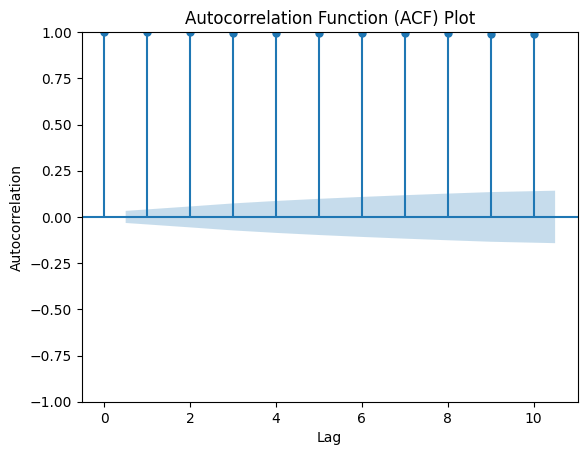

In [ ]:
## Autocorrelacion de las fechas de inicio
plt.figure(figsize=(12, 6))
plot_acf(data['FechaHoraInicio'], lags=10)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

<Figure size 1200x600 with 0 Axes>

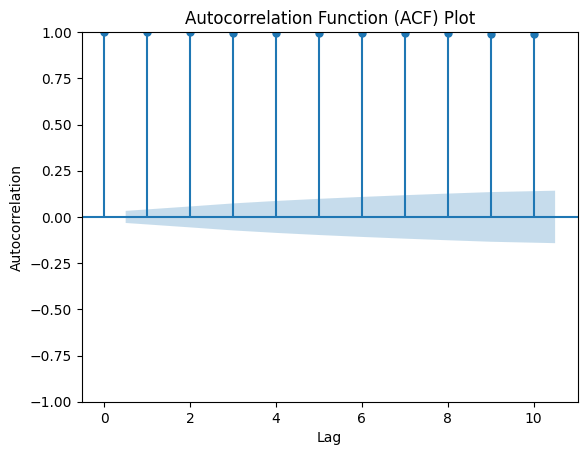

In [ ]:
## Autocorrelacion de las horas de fin
plt.figure(figsize=(12, 6))
plot_acf(data['FechaHoraFin'], lags=10)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

In [ ]:
data_origen_desc = data.groupby(['OrigenEvento', 'DescripcionEvento']).size().sort_values(ascending=False)
data_origen_desc

OrigenEvento   DescripcionEvento                                                                                                                                       
No programada  Demanda no atendida por bajas tensiones en la subestación EL BANCO 110 kV.                                                                                  33
               Demanda no atendida por disparo del activo GRANADA - OCOA 1 115 kV, dejando sin tensión las S/Es radiales GRANADA 115 kV y SAN JOSE DEL GUAVIARE 115 kV.    21
               Demanda no atendida por disparo del activo EL PASO - EL BANCO 1 110 kV dejando sin tensión la S/E radial EL BANCO 110 kV.                                   19
               Demanda no atendida por disparo del activo FUNDACION - TFUNDACION - RIO CORDOBA 1 110 kV.                                                                   17
               Demanda no atendida por disparo del activo EL PASO - EL COPEY 1 110 kV, dejando sin tensión las S/Es radiales EL PASO 110 kV y EL BANCO 110 kV.             13
                                                                                                                                                                           ..
               Demanda no atendida por disparo del activo BL1 TECHO A TERMINAL 115 kV, dejando sin tensión la S/E temporalmente radial TECHO 115 kV.                        1
               Demanda no atendida por disparo del activo BL1 TECHO A TERMINAL 115 kV.                                                                                      1
               Demanda no atendida por disparo del activo BL1 TERMINAL A TECHO 115 KV, dejando sin tensión la S/E radial TECHO 115 kV.                                      1
               Demanda no atendida por disparo del activo BL1 TERMOZIPA A GRAN SABANA 115 kV, dejando sin tensión la subestación radial GRAN SABANA 115 kV.                 1
Programada     por trabajos en consignaciones C0178175 C0178214 de los activos BARRA BOSTON 110 kV BT BOSTON 1 60 MVA 110 kV.                                               1
Length: 2812, dtype: int64

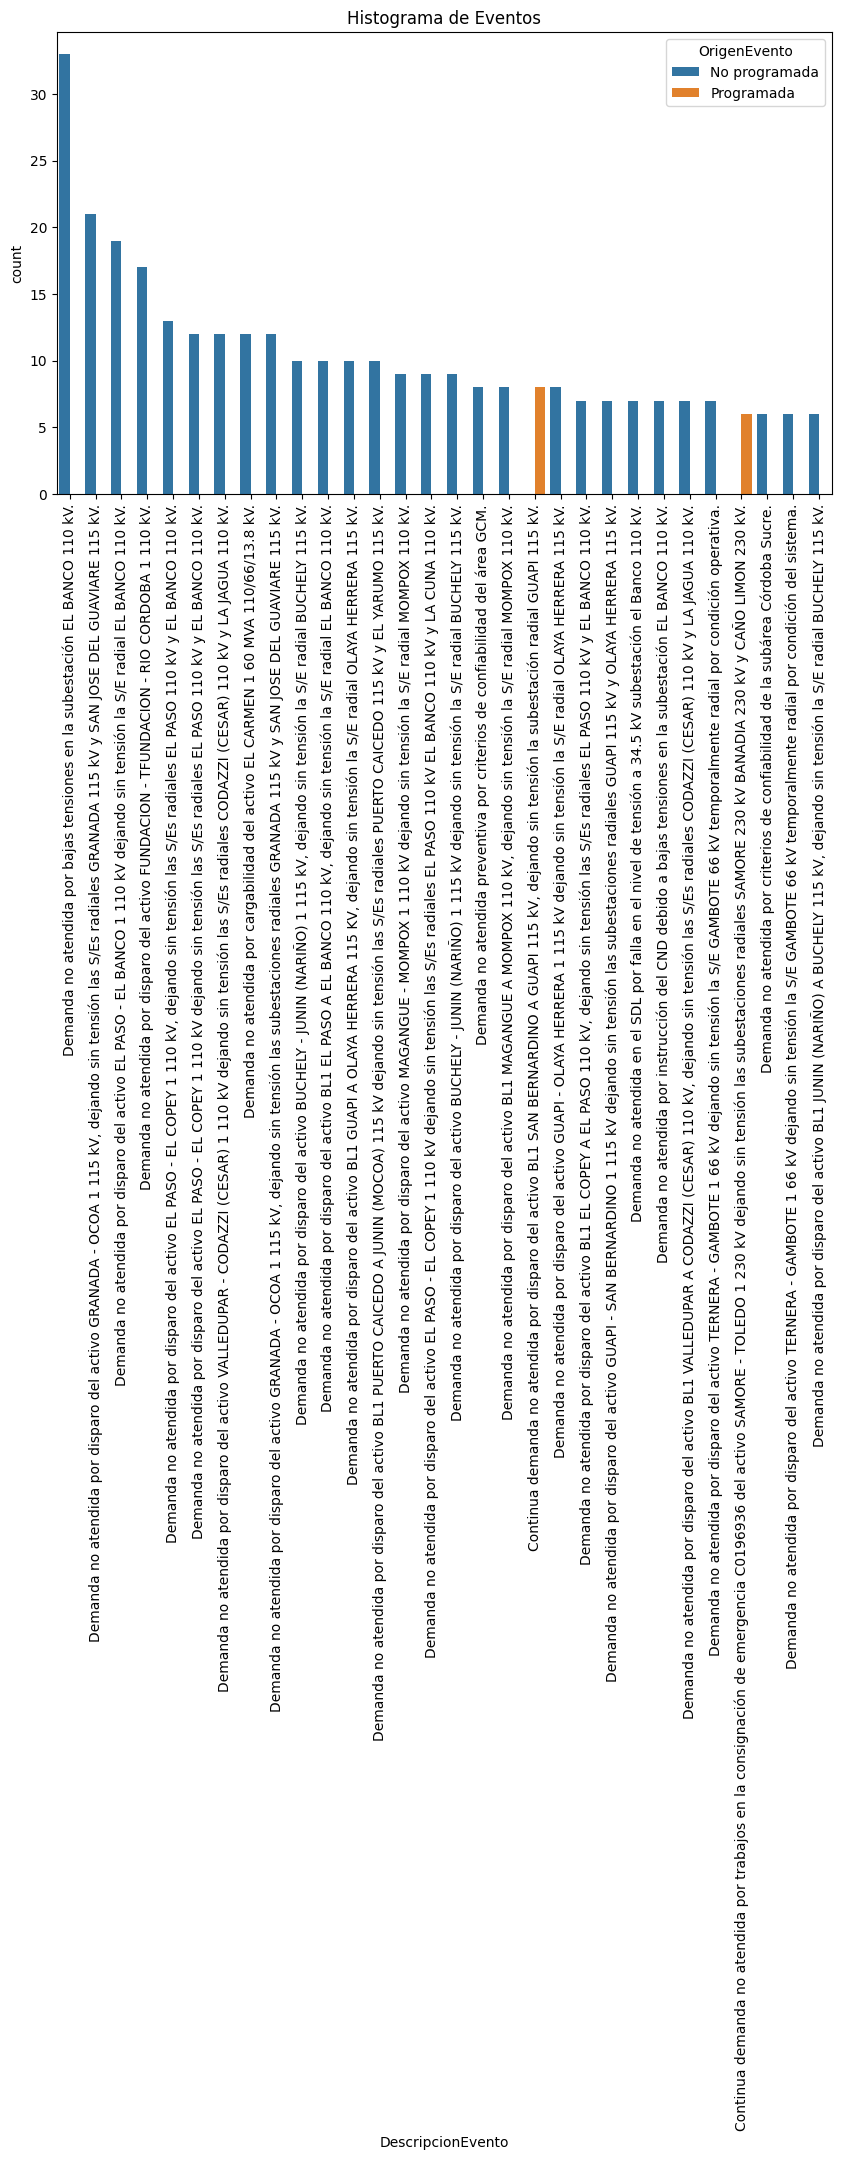

In [ ]:
category_counts = data['DescripcionEvento'].value_counts()
category_order = category_counts.index
top_30_categories = category_counts.head(30).index
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura si es necesario
sns.countplot(data=data, x="DescripcionEvento", hue="OrigenEvento", order=top_30_categories)
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para mejor legibilidad
plt.title('Histograma de Eventos')
plt.show()

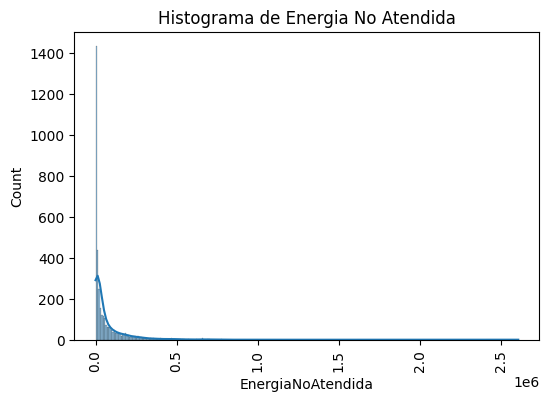

In [ ]:
plt.figure(figsize=(6, 4))  # Ajusta el tamaño de la figura si es necesario
sns.histplot(data=data, x="EnergiaNoAtendida", kde=True)
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para mejor legibilidad
plt.title('Histograma de Energia No Atendida')
plt.show()

In [ ]:
plt.figure(figsize=(6, 4))  # Ajusta el tamaño de la figura si es necesario
sns.histplot(data=data, x="EnergiaNoAtendida", kde=True)
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para mejor legibilidad
plt.title('Histograma de Energia No Atendida')
plt.show()

**Conclusiones**

In [ ]:
## Sumatoria de registros
print(f"El total de energia no atendida desde 2020-01-31 hasta 2024-04-30, fue de {data['EnergiaNoAtendida'].sum()} kWh en una duracion de {round(data['DuracionDias'].sum(),4)} dias, correspondiente a {round(data['DuracionHoras'].sum(), 4)} horas")

El total de energia no atendida desde 2020-01-31 hasta 2024-04-30, fue de 230814000.0 kWh en una duracion de 650.7444 dias, correspondiente a 15617.8667 horas


# **Construccion de modelo predictivo**

**Ingenieria de caracteristica**

In [ ]:
## Analisis temporal de eventos
data['DuracionSegundos'] = (data['FechaHoraFin'] - data['FechaHoraInicio']).dt.total_seconds()
data['DuracionSegundos'].sort_values(ascending=False)

,DuracionSegundos
2556,142260.0
3479,127680.0
2204,111180.0
2909,106200.0
3397,104820.0
...,...
3406,120.0
3534,60.0
1446,0.0
1122,0.0


In [ ]:
data['Duracion'] = (data['FechaHoraFin'] - data['FechaHoraInicio'])
data['DuracionHoras'] = data['Duracion'].dt.total_seconds() / 3600
data['DuracionHoras'].sort_values(ascending=False)

,DuracionHoras
2556,39.516667
3479,35.466667
2204,30.883333
2909,29.500000
3397,29.116667
...,...
3406,0.033333
3534,0.016667
1446,0.000000
1122,0.000000


In [ ]:
data['DuracionDias'] = data['Duracion'].dt.total_seconds() / (3600*24)
data['DuracionDias'].sort_values(ascending=False)

,DuracionDias
2556,1.646528
3479,1.477778
2204,1.286806
2909,1.229167
3397,1.213194
...,...
3406,0.001389
3534,0.000694
1446,0.000000
1122,0.000000


In [ ]:
## Estadisticos descriptivos
print(f"La duracion promedio  de los eventos en horas fue de: {round(data['DuracionHoras'].mean(), 5)}")
print(f"La mediana de la duracion de los eventos en horas fue de: {round(data['DuracionHoras'].median(), 5)}")
print(f"La desviacion estandar de los eventos en horas fue de: {round(data['DuracionHoras'].std(), 5)}")

La duracion promedio en horas fue de: 4.35038
La mediana de la duracion en horas fue de: 1.65833
La desviacion estandar en horas fue de: 5.5016


In [ ]:
## Calculo percentiles
print("Percentiles para duracion de eventos en horas")
print(f"El percentil 25% es igual a {data['DuracionHoras'].quantile(q=0.25)}")
print(f"El percentil 50% es igual a {data['DuracionHoras'].quantile(q=0.5)}")
print(f"El percentil 75% es igual a {data['DuracionHoras'].quantile(q=0.75)}")

Percentiles para duracion de eventos en horas
El percentil 25% es igual a 0.3
El percentil 50% es igual a 1.6583333333333332
El percentil 75% es igual a 7.616666666666666
